## Setting up arena for superdense coding.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [17]:
q = QuantumRegister (2)
ca = ClassicalRegister (2)
qc = QuantumCircuit(q, ca)

In [18]:
qc.h(q[0]) 
qc.cx(q[0],q[1])

In [19]:
def encode_message(qc, qubit, msg):
    if msg == "00":
        pass   
    elif msg == "10":
        qc.x(qubit)
    elif msg == "01":
        qc.z(qubit)
    elif msg == "11":
        qc.z(qubit)
        qc.x(qubit)
    else:
        assert(false)

## Sending code of 11

In [20]:
encode_message(qc, q[0], "11")

In [21]:
qc.cx(q[0],q[1])
qc.h(q[0]) 

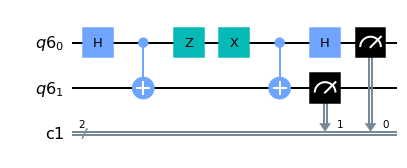

In [22]:
qc.measure(q[0],ca[0])
qc.measure(q[1],ca[1])
qc.draw(output="mpl")

## Running Circuit on Simulator

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots=1024)
sim_result = job_sim.result()

{'11': 1024}


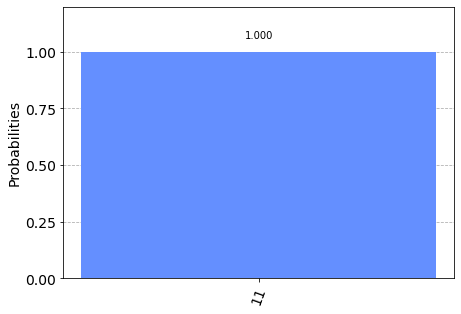

In [12]:
ca = sim_result.get_counts(qc)
print(ca)
plot_histogram(ca)

## Running Circuit on IBM-Q 

In [14]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [15]:
IBMQ.save_account('87b5504ba4d9e395e66a4573783065e9ae92da9fff677ac5250cc267642e769640d38f251e50a07ac35be446866b4c43d9df56a286fe67c10b5fdeb300cbc600')
IBMQ.load_account()

configrc.store_credentials:WARNING:2021-02-07 10:26:35,280: Credentials already present. Set overwrite=True to overwrite.
/home/arijit/anaconda3/envs/quantume/lib/python3.9/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_athens


In [23]:
job = execute(qc, backend=backend, shots=1024)

In [26]:
job_monitor(job)

Job Status: job has successfully run


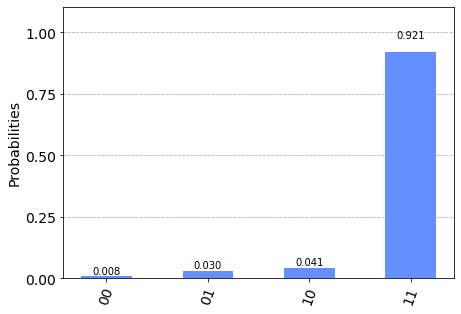

In [27]:
result = job.result()
plot_histogram(result.get_counts(qc))